<a href="https://colab.research.google.com/github/Hugo-Pare/Effects-of-confinement-COVID-19/blob/master/Confinement_en_Italie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lorsque le virus COVID-19 a frappé, chaque pays ont implementé leurs propres règles de confinement. Pour tester quel pays a le mieux gérer la situation, nous devons faire une analyse plus détaillée que de simplement regarder le graphique de cas total pour chaque pays. Voici comment se passe le confinement en Italie:

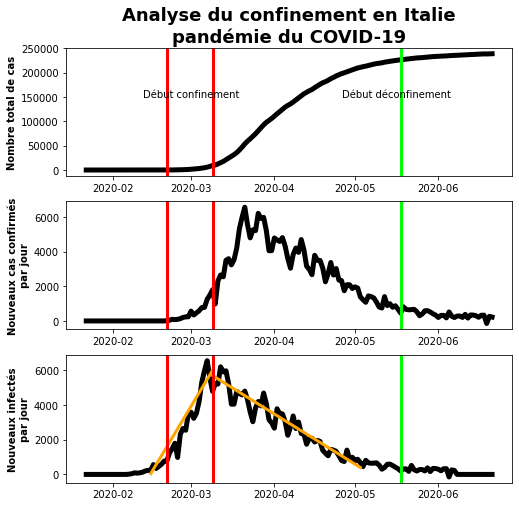

<Figure size 432x288 with 0 Axes>

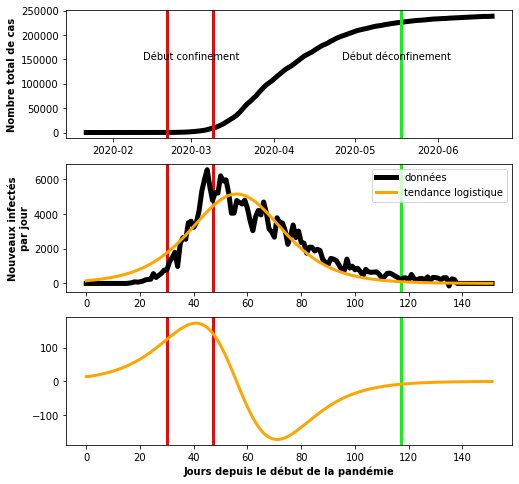

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import dates as mpl_dates
from datetime import datetime
from scipy import optimize

#---- Toutes les données du COVID-19 sont enregistrés quotidiennement dans un document csv.

URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)

#---- Dans le document csv, il y a les données de toutes les pays. Il faut donc lire seulement les informations de l'Italie.

df_italie = df1[df1['Country'] == 'Italy']

#---- Dans le document, il y a plusieurs informations :la date, le nombre de cas confirmé, le nombre de personnes qui ont survécu au virus et ceux qui sont décédé dû au virus. Il faut donc prendre seulement les données des cas
#---- confirmés et la date.

cas = df_italie['Confirmed']   

date = pd.to_datetime(df_italie["Date"])

#---- On créé la première figure contenant 3 graphiques
#---- 1e graphique

plt.figure(figsize=(8,8))

plt.subplot(311)                              
plt.plot(date, cas, "k", linewidth=5)
plt.ylabel("Nombre total de cas", fontsize=10, fontweight='bold')

#---- Pour changer les numéros en date

#print(date.iloc[30])                                           

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[30], color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(date.iloc[47], color = 'r', linewidth=3)  #Confinement obligatoire tout le pays (9mars2020)

plt.axvline(date.iloc[117], color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)

#---- Ajouter un titre

plt.title("Analyse du confinement en Italie\npandémie du COVID-19", fontsize=18, fontweight='bold')

#---- Ajouter du texte dans le graphique, début du confinement / début du déconfinement

plt.text(date.iloc[21], 150000, 'Début confinement', fontsize=10)

plt.text(date.iloc[95], 150000, 'Début déconfinement', fontsize=10)


#---- n pour nombre de lignes et on créé un tableau rempli de 0, et on spécifie que ce sera des nombres entiers.

n = np.size(cas)                      
nouveaux_cas = np.zeros(n, dtype=int)  
                                   
#---- Faire la dérivée du premier graphique en créant une boucle à partir des lignes du tableau. On obtient le nombre de nouveaux cas entre la date à la ligne 'i' et la date de la veille à la ligne 'i - 1'.

for i in range(1,n):
    new_cases = cas.iloc[i] - cas.iloc[i - 1]
    nouveaux_cas[i] = new_cases

#---- 2e graphique de la première figure

plt.subplot(312)

plt.plot(date, nouveaux_cas, "k", linewidth=5)
plt.ylabel("Nouveaux cas confirmés\npar jour", fontsize=10, fontweight='bold')

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[30], color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(date.iloc[47], color = 'r', linewidth=3)  #Début confinement en Italie(9mars2020)

plt.axvline(date.iloc[117], color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)

#---- Le 2e graphique décalé vers la gauche de 14 jours, puique le virus prend en(voir source WHO) moyenne de 5 à 6 jours avant de voir des symptomes chez une personne, cela peut prendre jusqu'à 14 jours
#---- alors le graphique est décalé de 14 jours.

#---- On refait le même graphique, mais on avance le graphique de 14 jours et on ajoute 14 zéros à la fin.
vrais_cas = np.array(nouveaux_cas[14:])
vraiscas = np.append(vrais_cas, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#print(vraiscas)

#---- 3e graphique de la première figure

plt.subplot(313) 

plt.plot(date, vraiscas, "k", linewidth=5)
plt.ylabel("Nouveaux infectés\npar jour", fontsize=10, fontweight='bold')

#---- Estimation du R0

plt.plot([date.iloc[24], date.iloc[47]],[50, 6000], "orange", linewidth=3, label= "Estimation de R0")

plt.plot([date.iloc[47], date.iloc[102]], [5700, 400], "orange", linewidth=3, label= "Estimation de R0")

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[30], color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(date.iloc[47], color = 'r', linewidth=3)  #Début confinement en Italie(9mars2020)

plt.axvline(date.iloc[117], color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)


#---- 2e figure de 3 graphiques - trouver des points d'inflexion dans la courbe
#---- 1e graphique

plt.figure()

plt.figure(figsize=(8,8))

plt.subplot(311)                               
plt.plot(date, cas, "k", linewidth=5)
plt.ylabel("Nombre total de cas", fontsize=10, fontweight='bold')

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[30], color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(date.iloc[47], color = 'r', linewidth=3)  #Début confinement en Italie(9mars2020)

plt.axvline(date.iloc[117], color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)

#---- Ajouter un titre à la deuxième figure

#plt.title("Analyse du confinement en Italie\npandémie du COVID-19", fontsize=18, fontweight='bold')

#---- Ajouter du texte dans le graphique, début du confinement / début du déconfinement

plt.text(date.iloc[21], 150000, 'Début confinement', fontsize=10)

plt.text(date.iloc[95], 150000, 'Début déconfinement', fontsize=10)


#---- 2e graphique de la deuxième figure
#---- On refait le 3e graphique de la première figure, celui dont les données sont décalés de 14 jours

plt.subplot(312)

vrais_cas = np.array(nouveaux_cas[14:])
vraiscas = np.append(vrais_cas, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  

#---- Pour réussir à faire une courbe de tendance, il a fallu changer les dates (Année, mois, jour) en le nombre de jours écoulés depuis la première journée

N  = len(date)

days = []
for i in range(N):
    days.append(i)

#---- Ajouter une courbe de tendance dans le deuxième graphique
#---- Définir la dérivée de la fonction logistique (fonction utilisé pour les propagations de virus)   

def logistique_deriv(x, x0, a, b, c):
    dx = x - x0
    exp = np.exp(-c*dx)
    return a*exp/(1.0 + b*exp)**2

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(30, color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(47, color = 'r', linewidth=3)  #Début confinement en Italie(9mars2020)

plt.axvline(117, color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)

plt.ylabel("Nouveaux infectés\npar jour", fontsize=10, fontweight='bold')

plt.plot(days, vraiscas, "k", linewidth=5, label="données")

#---- Optimiser les données et créé la courbde tendance

params, params_covariance = optimize.curve_fit(logistique_deriv, days, vraiscas, p0 = [40.0, 0.0, 0.0, 0.0])
plt.plot(days, logistique_deriv(days, *params), "orange", linewidth=3, label="tendance logistique")

#---- Insérer une légende

plt.legend()

#---- 3e graphique de la 2e figure

plt.subplot(313)


def logistique_deriv2(x, x0, a, b, c):
    dx = x - x0
    exp2 = np.exp(-c*dx)
    return (a*exp2/(1.0 + b*exp2)**2)-2*(a**2)*(exp2/(1.0 + b*exp2)**2)

d = np.size(cas)                      
cas_deriv2 = np.zeros(d, dtype=int)

for i in range(1,d):
    casderiv2 = vraiscas[i] - vraiscas[i - 1]
    cas_deriv2[i] = casderiv2

plt.axvline(30, color = 'r', linewidth=3)  #Début confinement dans certaines villes affectées (21février2020)
plt.axvline(47, color = 'r', linewidth=3)  #Début confinement en Italie(9mars2020)

plt.axvline(117, color = 'lime', linewidth=3)  #Fin confinement en Italie(18mai2020)

# Ton code original
# plt.plot(days, cas_deriv2, "k", linewidth=5, label="données")

# params2, params_covariance2 = optimize.curve_fit(logistique_deriv2, days, cas_deriv2)

# plt.plot(days, logistique_deriv2(days, *params2), "orange", linewidth=3, label="tendance logistique")

# Ce que je te propose
# Pour calculer la dérivée de logistique_deriv(), j'utilise la fonction
# gradient() de numpy. Je crois qu'il y a une erreur dans ta fonction
# logistique_deriv2()
deriv_2 = np.gradient(logistique_deriv(days, *params))
plt.plot(days, deriv_2, "orange", linewidth=3, label="tendance logistique")

# Note que je n'affiche pas cas_deriv2. Ces données fluctuent beaucoup et 
# masquent les variations de la courbe de tendance.

# Conclusion? Du jour 0 à 80, le nombre de cas augmentait (dérivée 2e positive).
# À partir du jour 80 (environ), ça s'est stabilisé (dérivée deuxième nulle) et 
# ça s'est mis à descendre (dérivée deuxième négative).

#plt.legend()

plt.xlabel("Jours depuis le début de la pandémie", fontsize=10, fontweight='bold')

plt.show()

**Légende de couleurs:**
Dates importantes du confinement

- La première ligne rouge représente le premier confinement dans 10 grandes villes touchées en Italie ([le 21 février 2020](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_Italy#Initial_lockdowns)).

- La deuxième ligne rouge représente le confinement obligatoire dans tout le pays ([le 9 mars 2020](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_Italy#Nationwide_expansion)).

- La ligne verte représente la réouverture de magasins, cinémas et musées ([le 18 mai 2020](https://www.forbes.com/sites/irenedominioni/2020/04/27/italy-towards-end-of-full-lockdown/#7cf01fb87921)).

**Graphiques 1 et 4 :** Ces graphiques indiquent le nombre de cas de COVID-19 total en Italie. Ces graphiques ne représentent que le nombre de personnes touchées et rien d'autre peut nous être transmis par ce graphique.

**Graphique 2 :** Le deuxième graphique est la dérivée du premier graphique, celui du nombre total de cas. Cela veut donc dire qu'il représente le nombre de nouveau cas par jour. Seulement par ce graphique, les mesures prises par l'Italie ne semblent pas assez strictes puisque le nombre de cas continue d'augmenter même après les restrictions. Il est encore impossible de savoir si le confinement a fonctionné, car ce sont seulement les personnes qui ont testés positif qui sont affichés sur le graphique.

**Graphique 3 :** Le troisième graphique est le deuxième graphique décalé de 14 jours. Une personne ayant le virus prend en moyenne de 5 à 6 jours avant d'avoir des symptomes, mais cela peut prendre jusqu'à 14 jours ([source du WHO](https://www.who.int/health-topics/coronavirus#tab=tab_3)). C'est pour cette raison que le deuxième graphique n'indique rien puisque plusieurs personnes transportent le virus, mais ne le savent pas encore. C'est durant les prochains jours qu'ils testeront positifs.

**Graphique 5 :** Le cinquième graphique est semblable au 3e graphique, par contre on insert une courbe de tendance logistique. Dans ce cas-si c'est la dérivée de [la fonction logistique](https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst)) :

$$f(x)= \frac{a}{1+ be^{-c(x-x0)}}$$

Sa dérivée : 

$$g(x) = a\frac{e^{-c(x-x0)}}{(1+ be^{-c(x-x0)})^2}$$

**Graphique 6 :** Le dernier graphique est la dérivée de la courbe de tendance du 5e graphique. La dérivée seconde permet d'évaluer le taux de variation. Il est difficile à déterminer quoi que ce soit avec la dérivée deuxième du nombre cas total de COVID-19, car les donéées sont trop volatiles. C'est pour cette raison qu'on dérive la courbe de tendance du 5e graphique. Grâce à cette courbe, nous pouvons voir que les restrictions misent par les différentes régions italiennes ont fonctionnées, car la courbe montre une baisse.

**Estimation du R0 :**

x = écart de jours

r = R0

$$f(x) = (r)^{x}$$

**R0 avant le confinement:**

Du jour 24 au jour 47
$$f(23) = (r)^x$$
$$6000 = (r)^x$$
$$r = 1,46$$

**R0 après le confinement:**

Du jour 47 au jour 102
$$f(55) = 5700(r)^x$$
$$400 = 5700(r)^x$$
$$r = 0,95$$

**Conclusion :**

Est-ce que les restrictions misent par l'Italie ont réussi à arrêter le virus?

Est-il trop tôt pour réouvrir les commerces en Italie?